# 4.1 Digital sampling and reconstruction

## 4.1.1 Discrete time signals

Computers see signals in manner very differently than nature,  
but using computers, or applying digital signal processing, is a mainstay of modern engineering  
A computer can only sample the signal at specific moments in time  
This is called discrete time, as opposed to continuous time  
[Discrete time](https://en.wikipedia.org/wiki/Discrete_time_and_continuous_time)
  
Nature sees continuous time signals  
Up until now, all the signals we have talked about were continuous time signals  
  
The figure in the Wikipedia page shows a graphic comparing discrete time and continuous time signals  
![image1!](./images_s4/image_4_1_1.png)  
The key difference between continuous time and discrete time is when the value of the function is known  
  
> **A continuous time signal's value is known at every moment in time,  
while a discrete time signal's values are known only at discrete moments in time**  
  
The discrete time system has no knowledge of what is happening between samples  
  
The moment in time, when a discrete time signal is known, is called a sample  
In almost every system, samples are equally spaced in time  
The time between the samples is called the sampling period,  
and very often is defined by the capital letter, $T$, or sometimes $T_s$  
The inverse of the sampling period is called the sampling rate, or sampling frequency,  
and is defined as $f_s=\frac{1}{T}$  
  
Because computers are used so much in modern engineering, virtually all signals we study are discrete time signals  
All along, we have been assuming the signals we created are continuous time signals,  
when in fact they have been discrete time signals  
For example, when we write the code t, y = lti_system.step(),  
the method returns a set of points at specific moments in time,  
that's a discrete time signal, the method does not return a continuous signal  
There are conditions when it is okay to assume discrete time signals approximate continuous time signals,  
and we have made sure in the previous work that these conditions were met  
  
Another way to explain a discrete time signal, is that it is a list of numbers  
The code cell below prints and plots a discrete time signal

A discrete time signal is a list of numbers

[ 5.          2.65821326 -0.10324691 -2.84840666 -5.14386563 -6.62722132
 -7.06428448 -6.38605245 -4.69960316 -2.27118987  0.51579437  3.22134602
  5.41831796  6.75985664  7.03416258  6.19792892  4.38317857  1.8764207
 -0.92658275 -3.58329915 -5.6742914  -6.86943781 -6.98005103 -5.98866768
 -4.05180537]


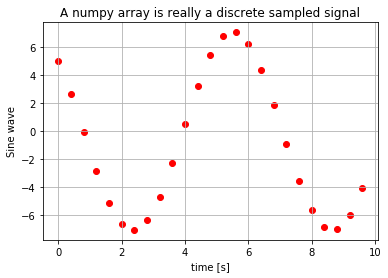

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# create a time array for when a discrete time set of samples will occur
# assume SI units for time, or [s]
# in this example the sampling period is 0.4 seconds/sample
# which corresponds to a sampling rate of 2.5 samples/second
# be sure to recognize that sampling rate is a frequency, you are counting
# how many samples are taken in one second
t = np.arange(0, 10, 0.4)

# create a discrete time signal
# phasor (5+5j) is a cosine wave shifted by +45 degrees (shifted left)
# and has a magnitude of sqrt(5**2 + 5**2) = 7.07
f_t = (5+5j)/2*np.exp(1j*t) + (5-5j)/2*np.exp(-1j*t)

print('A discrete time signal is a list of numbers\n')
print(f_t.real)
plt.scatter(t, f_t.real, color='r')
plt.xlabel('time [s]')
plt.ylabel('Sine wave')
plt.title('A numpy array is really a discrete sampled signal')
plt.grid()

## 4.1.2 Converting continuous time signals to discrete time

Systems in nature produce continuous time signals,  
such as accelerometers, gyroscopes, thermometers, or phototransistors  
In order for a computer to analyze these signals, it must convert them from continuous time,  
to a discrete time set of numbers  
  
> **The process of converting continuous time signals to discrete time is called sampling**  
  
mathematically, it can be done by multiplying the continuous time signal,  
by the Dirac comb signal we described earlier  
This is the process highlighted in the Wikipedia figure above  
  
The hardware unit that takes discrete time samples is called an analog to digital converter  
[ADC](https://en.wikipedia.org/wiki/Analog-to-digital_converter)  
  
ADC units have a piece of hardware called sample-and-hold  
later we will talk about DACs and something called first-order hold  
Sample-and-hold and first-order hold are completely unrelated and should not be confused  
  
When using an Arduino, the command to take a sample with the ADC unit, is called analogRead()  
[analogRead()](https://www.arduino.cc/en/Reference.AnalogRead)  
  
If f(t) from the Wikipedia figure above were sampled by an Arduino's analogRead() method,  
the following set of numbers would be returned  
f(kT)= [0, 620, 806, 566, 392, 544, 849, 969, 718, 424, 403, 544, 599, 435],  
where k is the integers from 0 to 13 and T is the sampling period  
  
We are going to study the effect of discrete time signals, as they pertain to linear systems  
We will pay particular attention to the frequency response of discrete time systems,  
but sampling does not have an effect on the frequency response, as long as proper conditions are met  
Sampling just creates a set of numbers from a continuous time signal
  
The code cell below plots the converted numbers from the Wikipedia figure

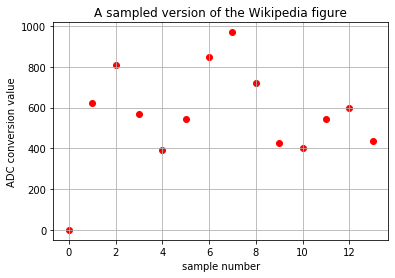

In [2]:
f_kT= [0, 620, 806, 566, 392, 544, 849, 969, 718, 424, 403, 544, 599, 435]
plt.scatter(range(0,14), f_kT, color='r')
plt.xlabel('sample number')
plt.ylabel('ADC conversion value')
plt.title('A sampled version of the Wikipedia figure')
plt.grid()

## 4.1.3 Missing information in discrete time signals

Once you have a discrete time signal - a set of numbers at a particular samping rate,  
the information about the value of the signal between samples is missing  
This information is not missing from continuous time signals - they are known for every moment in time  
  
The discrete time data tells you nothing about the signal between samples  
Consider the figures shown below  
![image2!](./images_s4/image_4_1_2.png)  
Anything could be going on between the sampled points!  
  
The figure shows two different continuous time waves that have the same exact set of samples  
In fact, an infinite number of different continuous time waves could pass through the same discrete time values  
  
What good is sampling if it can't uniquely define a single wave?  
Well, discrete time sampling can define a unique continuous time wave - as long as you meet a condition  
The condition is called the Nyquist–Shannon sampling limit  

## 4.1.4 Nyquist–Shannon sampling theorem

If you look at the figure above, its the high frequency changes that cause the problem  
You could reason that as long as the frequencies of the continuous time signal are small enough,  
then the sampler would reconstruct a unique wave  
  
Indeed that's the case. The frequencies that can be sampled must be limited  
From Wikipedia, the Nyquist–Shannon sampling theorem states  
[Nyquist–Shannon sampling theorem](https://en.wikipedia.org/wiki/Nyquist–Shannon_sampling_theorem)  
  
>If a function f(t) contains no frequencies higher than B hertz,  
it is completely determined by giving its ordinates at a series of points spaced $\frac{1}{2B}$ seconds apart  
  
This means the sampling period must be $T\leq\frac{1}{2B}$  
or the sampling frequency must be $f_s\geq2B$  
  
When you sample a sin/cos wave at the Nyquist limit, you only get 2 samples per cycle  
but that's enough!
  
You must sample at least two times faster than any frequency contained in the continuous time signal

## 4.1.5 Aliasing

Of course, you can send any signal you want into an ADC sampler  
So what happens if you send a signal with a frequency greater than $\frac{f_s}{2}$ into the ADC?  
  
Assume you have a sampler with a sampling rate of 1000 samples/second  
The highest frequency sin/cos wave you can sample is 500Hz  
  
The code cell below puts a 900Hz signal into the system and highlights the samples

Text(0.5, 1.0, 'The samples clearly form a 100Hz cos signal')

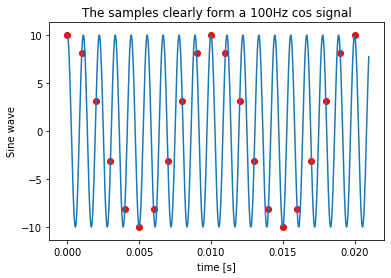

In [3]:
# create a time array and a sine wave
t = np.arange(0, 0.021, 0.00001) # 100,000 samples per second
f_t = 5*np.exp(2*np.pi*900j*t) + 5*np.exp(-2*np.pi*900j*t)

# create a time array at a lower sampling rate 
# and the same sine wave at the lower sampling rate
sample_times =  np.arange(0, 0.021, 0.001) # 1000 samples per second
samples = 5*np.exp(2*np.pi*900j*sample_times) + 5*np.exp(-2*np.pi*900j*sample_times)

plt.plot(t, f_t.real)
plt.scatter(sample_times, samples.real, color='r')
plt.xlabel('time [s]')
plt.ylabel('Sine wave')
plt.title('The samples clearly form a 100Hz cos signal')

That's crazy! You put in a 900Hz wave and a sampled wave of 100Hz wave comes out  
  
The phenomenon that describes what is happening is called aliasing  
[Aliasing](https://en.wikipedia.org/wiki/Aliasing)  
  
All frequencies greater than 500Hz, that enter this sampling system  
will get aliased to frequencies below 500Hz  
  
The figure below shows how high-frequencies are aliased to lower frequencies  
The example with 900Hz entering the sampler and 100Hz coming out is highlighted by a blue dot  
![image3!](./images_s4/image_4_1_3.png)  
Notice the y-axis. A discrete time sampling system with a sampling rate of 1000 samples per second  
will think all signals it receives are at 500Hz or below  
  
Once a signal is aliased to a lower frequency, you cannot remove it by filtering  
The aliased frequencies become noise that you cannot remove  

## 4.1.6 Frequencies associated with discrete time

We have learned that the frequency $s$ is a complex number,  
which can be completely specified on a special complex plane called the s-plane  
  
But we have just seen that in a discrete time system if the frequency,  
$s=j\omega$, (converted to Hz) is greater than half the sampling rate, then it will get aliased  
It would be great if there was a mathematical relationship that expresses how the frequency $s$ aliases  
and indeed there is  
  
$$z=e^{sT}$$  
$z$ is a new complex frequency associated with discrete time systems  
$s$ is the continuous time frequency entering the discrete time system  
and $T$ is the sampling period  
  
As far as frequencies go, $z$ is very unusual, because it is normalized  
There are no units for $z$  
  
The inverse of frequency is usually a time unit,  
as in $T=\frac{1}{f}$, when $s=j\omega$ and $\omega=2\pi f$  
or $\tau=\frac{1}{\alpha}$, when $s=\alpha$  
  
Because $z$ is unitless, the inverse of $z$, typically written as $z^{-1}$ is also unitless  
$z^{-1}$ represents a delay of one sample period, regardless of the sampling rate  
It represents a delay to the previous number in the list of discrete time numbers  

## 4.1.7 The frequency, z, handles aliasing

Consider the 900Hz wave we studied above, this wave has a frequency $s=\pm j\omega=\pm j2\pi f=\pm j5655$ [rad/s]  
If we assume a sampling period of $T=0.00001$ (100,000 samples/sec)  
Then the complex normalized discrete time frequency is $z=e^{sT}=0.9984\pm0.05652j$  
  
If we consider the same sine wave, only this time sampled at 1000 samples/sec,  
then the sampling period is $T=0.001$  
and the complex normalized discrete time frequency is $z=0.8090\mp0.5878j$  
Notice, the same continuous time frequency sin/cos wave,  
has a different complex discrete time frequency depending on the sampling rate  
  
We know from the text above, that the 900Hz sine wave actually aliased to 100Hz  
The complex discrete time frequency of a 100Hz sin/cos wave,  
sampled at 1000 samples per second is also $z=0.8090\pm0.5878j$  

You can see that in our system, 900Hz and 100Hz have the same normalized complex discrete time frequency, $z$  
The complex frequency, $z$, can never represent a wave with a frequency higher than half the sampling rate  
  
The code cell below converts the values of $s$ to $z$ for you

In [4]:
s1 = 1j*2*np.pi*900
T1 = 0.00001
z1 = np.exp(s1*T1)
print('For 900Hz sampled at T=0.00001, z=', z1, np.conjugate(z1))
s2 = 1j*2*np.pi*900
T2 = 0.001
z2  =np.exp(s2*T2)
print('For 900Hz sampled at T=0.001, z=', z2, np.conjugate(z2))
s3 = 1j*2*np.pi*100
T3 = 0.001
z3 = np.exp(s3*T3)
print('For 100Hz sampled at T=0.001, z=', z3, np.conjugate(z3))

For 900Hz sampled at T=0.00001, z= (0.998401550108975+0.05651853448202453j) (0.998401550108975-0.05651853448202453j)
For 900Hz sampled at T=0.001, z= (0.8090169943749473-0.5877852522924734j) (0.8090169943749473+0.5877852522924734j)
For 100Hz sampled at T=0.001, z= (0.8090169943749475+0.5877852522924731j) (0.8090169943749475-0.5877852522924731j)


## 4.1.8 Signals described by the frequency z

Continuous time signals are described by  
  
$$f(t)=\frac{A}{2}e^{st}+\frac{A^*}{2}e^{s^*t}$$  
  
where $A$ is a phasor and $s$ is the complex frequency $\alpha\pm j\omega$  
This equation describes a class of 6 types of signals  
1. constant DC, $s=0$
2. shrinking exponential, $s=\alpha$, $\alpha<0$, $\omega=0$
3. growing exponential, $s=\alpha$, $\alpha>0$, $\omega=0$
4. sin/cos waves, $s=\pm j\omega$, $\alpha=0$
5. exponentially shrinking sin/cos waves, $s=\alpha\pm j\omega$, $\alpha<0$
6. exponentially growing sin/cos waves, $s=\alpha\pm j\omega$, $\alpha>0$
  
The frequency $z$ describes the same set of waves, but the waves are discrete time signals  
$z$ describes waves that are a set of numbers, specified at integer multiples of the sampling period  
  
Consider  
  
$$z=e^{sT}\Rightarrow s=\frac{\ln{z}}{T}$$  
and substitute into the time dependent signal expression  
  
$$f(t)=\frac{A}{2}e^{\frac{\ln{z}}{T}t}+\frac{A^*}{2}e^{\frac{\ln{z^*}}{T}t}$$  
because $e^{\ln{z}}=z$, this can be rewritten as  
  
$$f(t)=\frac{A}{2}z^{\left(\frac{t}{T}\right)}+\frac{A^*}{2}z^{*\left(\frac{t}{T}\right)}$$  
but this is only valid at discrete moments in time,  
when $t=kT$, where $k$ is an integer $\geq0$; $k=0,1,2,\cdots$  
  
$$f(kT)=\frac{A}{2}z^k+\frac{A^*}{2}z^{*k}$$  
This equation creates the same class of 6 different types of waves,  
but described with the normalized complex discrete time frequency, $z$  
  
The code cell below produces our 900Hz cosine wave, with $z=0.9984\pm0.05652j$  
This was for a sampling rate of 100,000 samples/sec,  
so each cycle of the sin/cos wave requires 111 samples  
  
The code cell will create 5 periods of the sin/cos wave  
Notice in the code, no time is given, it is just a number of samples from $k=0$ to $555$  
because computers consider the time axis as a unitless indexed set of numbers,  
the period is often dropped from the function's dependent variable  
and the function is represented with brackets to emphasize an indexed set of points  
  
$$f[k]=\frac{A}{2}z^k+\frac{A^*}{2}z^{*k}$$  

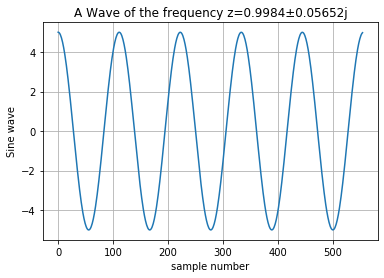

In [5]:
k = np.array(range(0, 555))
z = 0.9984+0.05652j
A = 5
f_k = (A/2)*z**k + (np.conjugate(A)/2)*np.conjugate(z)**k

plt.plot(k, f_k.real)
plt.xlabel('sample number')
plt.ylabel('Sine wave')
plt.title('A Wave of the frequency z=0.9984±0.05652j')
plt.grid()

An exponentially decaying sin/cos wave simply has a different frequency,  
such as $s=-500\pm5000j$, which is $z=e^{sT}=0.9938\pm0.04973j$

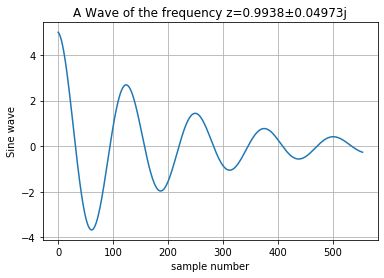

In [6]:
z = 0.9938+0.04973j
f_k = (A/2)*z**k + (np.conjugate(A)/2)*np.conjugate(z)**k

plt.plot(k, f_k.real)
plt.xlabel('sample number')
plt.ylabel('Sine wave')
plt.title('A Wave of the frequency z=0.9938±0.04973j')
plt.grid()

## 4.1.9 Converting discrete time signals to continuous time

In everything we have done so far, we have concerned ourselves with sampling a continuous time wave  
That is, converting a continuous time signal to a set of numbers  
and representing that set of numbers as complex frequencies, $z$  
  
Just as often, we may want to produce a continuous time signal  
from a set of discrete time numbers  
  
This process is known as digitial to analog conversion, and the hardware is called a DAC  
[DAC](https://en.wikipedia.org/wiki/Digital-to-analog_converter)  
  
The Arduino can produce a wave using a DAC with the analogWrite() command, but it is somewhat rare  
Typically, analogWrite() targets a PWM unit,  
The PWM can produce the wave we are interested in, but only with additional continuous time filtering  
Some modern Arduinos, such as the Arduino zero, the PJRC Teensy product line,  
or the Adafruit Metro, Itsybitsy, Feather M0/M4 product lines have DAC capability  
Arduino calls it true analog output  
[analogWrite()](https://www.arduino.cc/reference/en/language/functions/analog-io/analogwrite/)
  
When a continuous time signal is sampled properly with respect to the Nyquist-Shannon limit,  
the sampled points will contain all the proper frequency information    
However, when that same signal is converted back into a continuous time signal  
the DAC has a large impact on the continuous time frequency of the signal  
This is because the DAC fills in the unknown information between samples required for continuous time signals  
All modern DACs simply hold the value constant until the time for the next sample  
Holding the value constant is called zero-order hold  
  
For the signal from the wikipedia page, the following figure shows the result  
![image4!](./images_s4/image_4_1_4.png)  
If you look at the figure carefully, you will see that the original continuous time wave  
and the approximated continuous time wave are very different  
You should expect much different frequency information contained in each wave  
but the differences are all about the frequencies above the Nyquist-Shannon sampling limit  
Below the sampling limit, the frequency information is virtually the same